<a href="https://colab.research.google.com/github/marcinwolter/MachineLearnin2019/blob/master/mnist_mlp_minimal_hyperopt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 10 #20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# print info about a shape of arrays
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')
print(y_train.shape, 'train samples')
print(y_test.shape, 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# print info about a shape of arrays
print(x_train.shape, 'train samples after conversion')
print(x_test.shape, 'test samples  after conversion')
print(y_train.shape, 'train samples after conversion')
print(y_test.shape, 'test samples  after conversion')




Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
(60000, 784) train samples
(10000, 784) test samples
(60000,) train samples
(10000,) test samples
(60000, 784) train samples after conversion
(10000, 784) test samples  after conversion
(60000, 10) train samples after conversion
(10000, 10) test samples  after conversion


In [0]:
space = {

            'units1': hp.quniform('units1', 32,1024,32),
#            'units2': hp.quniform('units2', 64,1024,16),
#            'units3': hp.quniform('units3', 64,1024,16),


            'dropout1': hp.quniform('dropout1', .00,.50,.05),

        }

In [0]:
def f_nn(params):   

    print ('Parameters testing: ', params)

    model = Sequential()
    model.add(Dense(int(params['units1']), activation='relu', input_shape=(784,)))
    model.add(Dropout(params['dropout1']))
    model.add(Dense(int(params['units1']), activation='relu'))
    model.add(Dropout(params['dropout1']))
    model.add(Dense(int(params['units1']), activation='relu'))
    model.add(Dropout(params['dropout1']))
    model.add(Dense(num_classes, activation='softmax'))

    #model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))
    
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test accuracy:', score[1])

    return {'loss': -score[1], 'status': STATUS_OK}



# **Find the best parameters:**

In [4]:

trials = Trials()
best = fmin(f_nn, space, algo=tpe.suggest, max_evals=50, trials=trials)



Parameters testing: 
{'dropout1': 0.25, 'units1': 192.0}
  0%|          | 0/50 [00:00<?, ?it/s, best loss: ?]WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Test accuracy:
0.9779
Parameters testing: 
{'dropout1': 0.30000000000000004, 'units1': 384.0}
Test accuracy:
0.9816
Parameters testing: 
{'dropout1': 0.45, 'units1': 32.0}
Test accuracy:
0.9314
Parameters testing: 
{'dropout1': 0.05, 'units1': 704.0}
Test accuracy:
0.9785
Parameters testing: 
{'dropout1': 0.2, 'units1': 896.0}
Test accuracy:
0.9803
Parameters testing: 
{'dropout1': 0.25, 'units1': 640.0}
Test accuracy:
0.9821
Parameters testing: 
{'dropout1': 0.2, 

In [5]:
print('best: ', best)
print('best accuracy: ',-trials.best_trial['result']['loss'])

#from hyperopt import space_eval
#print('best parameters: ',space_eval(space, best))

best:  {'dropout1': 0.15000000000000002, 'units1': 576.0}
best accuracy:  0.9833


# **Visualization**

Text(0, 0.5, '$units$')

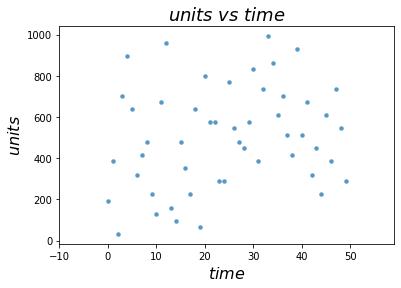

In [6]:
#units vs time

f, ax = plt.subplots(1)
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['units1'] for t in trials.trials]
ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$units$ $vs$ $time$ ', fontsize=18)
ax.set_xlabel('$time$', fontsize=16)
ax.set_ylabel('$units$', fontsize=16)

Text(0, 0.5, '$dropout$')

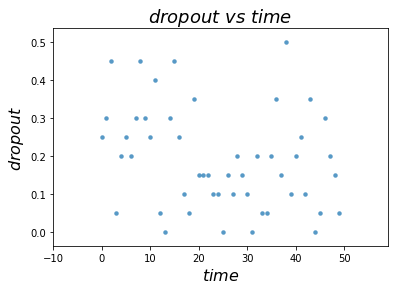

In [7]:
#units vs time

f, ax = plt.subplots(1)
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['dropout1'] for t in trials.trials]
ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$dropout$ $vs$ $time$ ', fontsize=18)
ax.set_xlabel('$time$', fontsize=16)
ax.set_ylabel('$dropout$', fontsize=16)

Text(0, 0.5, '$dropout$')

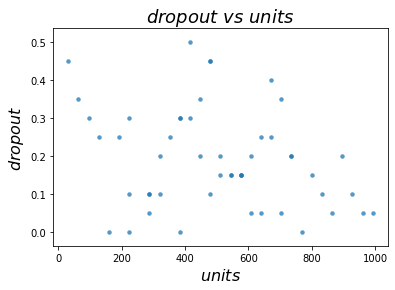

In [8]:
#dropout vs units

f, ax = plt.subplots(1)
xs = [t['misc']['vals']['units1'] for t in trials.trials]
ys = [t['misc']['vals']['dropout1'] for t in trials.trials]
#ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$dropout$ $vs$ $units$ ', fontsize=18)
ax.set_xlabel('$units$', fontsize=16)
ax.set_ylabel('$dropout$', fontsize=16)

Text(0, 0.5, '$accuracy$')

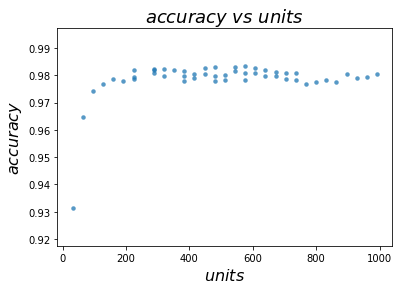

In [9]:
#value vs units

f, ax = plt.subplots(1)
xs = [t['misc']['vals']['units1'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
#ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$accuracy$ $vs$ $units$ ', fontsize=18)
ax.set_xlabel('$units$', fontsize=16)
ax.set_ylabel('$accuracy$', fontsize=16)



Text(0, 0.5, '$accuracy$')

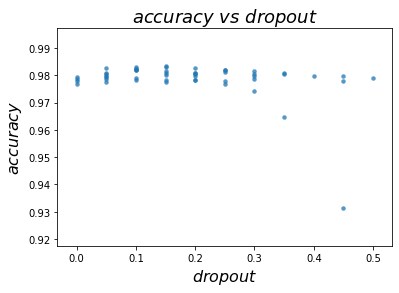

In [10]:
#value vs dropout

f, ax = plt.subplots(1)
xs = [t['misc']['vals']['dropout1'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
#ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$accuracy$ $vs$ $dropout$ ', fontsize=18)
ax.set_xlabel('$dropout$', fontsize=16)
ax.set_ylabel('$accuracy$', fontsize=16)

